### 1D and 2D Discrete Wavelet Transform

In [3]:
conda install matplotlib

Solving environment: done

## Package Plan ##

  environment location: /home/iretex/miniconda3/envs/env_rs

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_7          18 KB
    brotli-bin-1.0.9           |       h5eee18b_7          19 KB
    contourpy-1.0.5            |   py38hdb19cb5_0         203 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    expat-2.4.9                |       h6a678d5_0         156 KB
    fontconfig-2.14.1          |       h52c9d5c_1         281 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    giflib-5.2.1               |       h5eee18b_3          80 KB
    glib-2.69.1                |       he621ea3_2     

In [4]:
import numpy as np
# we need to install PyWavelets labrary either by running "pip install PyWavelets" or "conda install pywavelets"
import pywt
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [5]:
# The PyWavelets library contains 14 Mother wavelets, varying by shape, smoothness and compactness. 
# They satisfy two mathematical conditions: 1. They are localized in time and frequency, 2. They have 0 mean.
# Explore wavelets further http://wavelets.pybytes.com/
print(pywt.families(short=False))


['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


/home/iretex/miniconda3/envs/env_rs/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


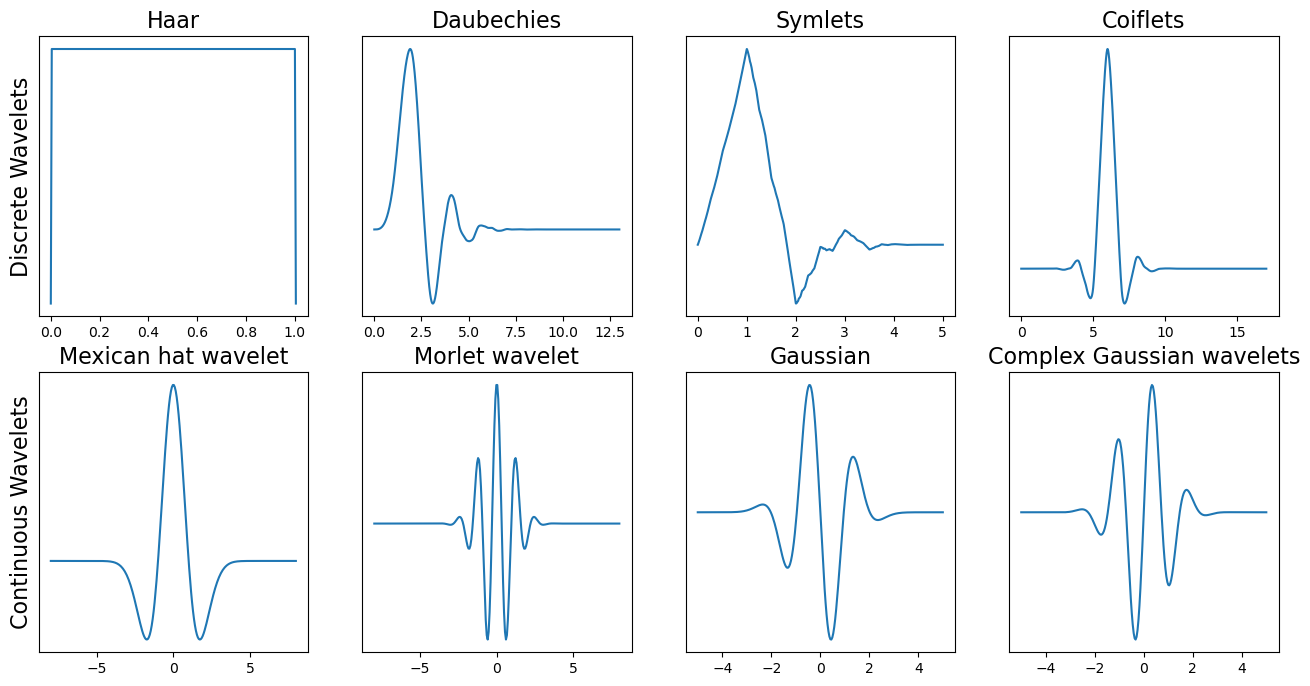

In [6]:
discrete_wavelets=['Haar','db7','sym3','coif3']
continuous_wavelets=['mexh','morl','gaus5','cgau7']

wavelets=[discrete_wavelets, continuous_wavelets]
funcs=[pywt.Wavelet, pywt.ContinuousWavelet]
fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for i, get_wavelets in enumerate(wavelets):
    func=funcs[i]
    row_no=i
    for col_no, wavel_name in enumerate(get_wavelets):
        wavelet=func(wavel_name) 
        family_name=wavelet.family_name
        if i==0:
            f=wavelet.wavefun()
            wavelet_function=f[0] # get an array of y-values
            x_values=f[-1] # get an array of x-values
        else:
            wavelet_function, x_values=wavelet.wavefun()
        if col_no==0 and i==0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no==0 and i==1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.show()


### How are these wavelets different?

## Discrete Wavelet transform: 1D study

We have seen that the DWT is implemented as a filter bank or a cascade of high-pass and low-pass filters. 
To apply the DWT on a signal, we start with the smallest scale. Small scales correspond to high frequencies. We first analyze high frequency behavior. At the second stage, the scale increases by a factor of 2 (the frequency decreases by a factor of 2). At this stage, we analyze the signal sections of half of the maximum frequency. We keep iterating the decomposition process until we reach a maximum decomposition level.
Understanding of the maximum decomposition level: Due to downsampling, at some stage in the process, the number of samples in the signal will become smaller than the length of the wavelet filter and we will have reached the maximum decomposition level.


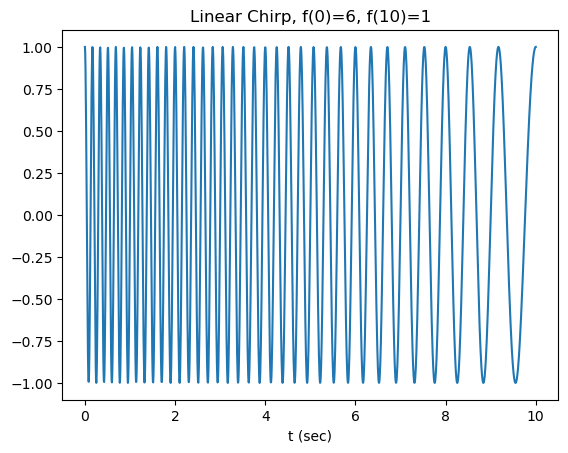

In [7]:
# create a signal to analyse
from scipy.signal import chirp, spectrogram
# e.g., linear chirp satisfies the following equation: f(t)=f0+(f1-f0)*t/t1
t=np.linspace(0, 10, 1500) # 1500 sampling points in 10 seconds
signal=chirp(t, f0=6, f1=1,t1=10, method='linear')
plt.plot(t,signal)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

### Computing the frequency range of different levels of the coefficients.
We have 1500 sampling points in 10 sec. This means that we have the frequency of 150 samples per second.
So, the first approximation level will contain frequencies from 0 to 75, and the detail from 75 to 150.
The second level approximation will contain frequencies from 0 to 37.5, and the detail will contain the subband from 37.5 until 75.
The third level approximation will contain frequencies up to 18.75, and the detail will contain a subband between 18.75 and 37.5.
Finally, the fourth level will contain frequencies up to 9.375, and the detail will contain the frequency range of [9.375, 18.75].

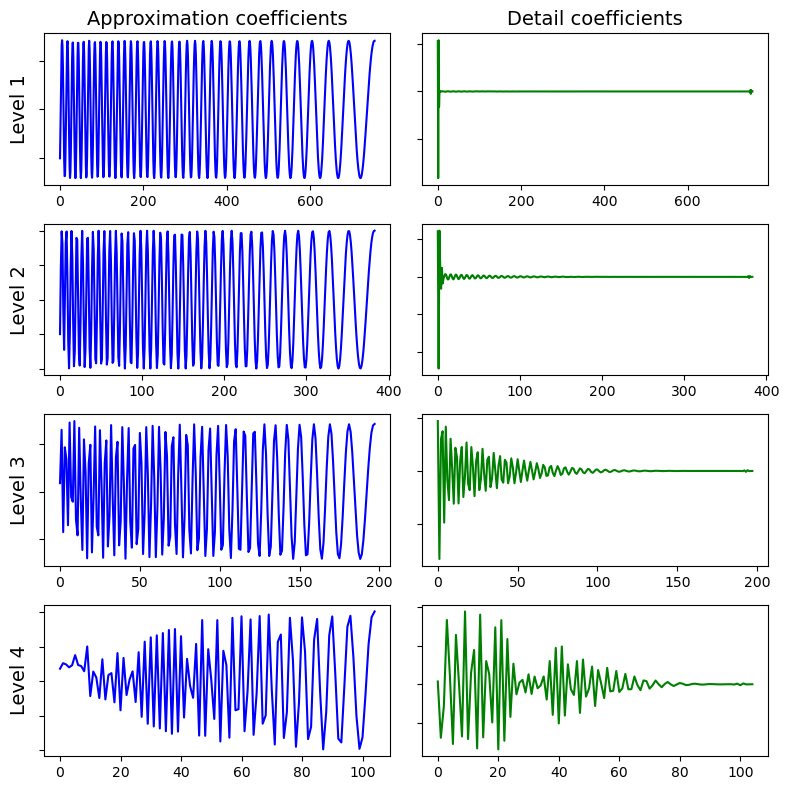

In [8]:
data = signal
waveletname = 'db7'
# let's setup a 4-step filter bank to find the approximation and detail wavelet coefficients of the signal wavelet transform   
fig, axarr = plt.subplots(nrows=4, ncols=2, figsize=(8,8))
#collect the wavelet coefficients into 
app_coeffs=[]
det_coeffs=[]
for i in range(4):
    (data, coeff_d) = pywt.dwt(data, waveletname) # perform single stage iteratively
    app_coeffs.append(data)# approximation coefs
    det_coeffs.append(coeff_d)
    axarr[i, 0].plot(data, 'b')
    axarr[i, 1].plot(coeff_d, 'g')
    axarr[i, 0].set_ylabel("Level {}".format(i + 1), fontsize=14, rotation=90)
    axarr[i, 0].set_yticklabels([])
    if i == 0:
        axarr[i, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[i, 1].set_title("Detail coefficients", fontsize=14)
    axarr[i, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

### Question 1: Given results obtained above, what represents the output of the high pass filter? What happens to signal resolution as you go from one level of the wavelet transform to the next? How were detail coefficients at each level generated?  

In [ ]:
# leave your answer here



In [ ]:
## Signal reconstruction/ synthesis
#___________________________________
order=[3,2,1,0]
app_coeffs=[app_coeffs[i] for i in order]
det_coeffs=[det_coeffs[i] for i in order]
coeffs = pywt.wavedec(signal, 'db7', level=4)# prepare all coefficients in the right format for .waverec function
signal_r=pywt.waverec(coeffs, 'db7')
fig=plt.figure(figsize=(16,8))
plt.subplot(121)
plt.plot(t,signal)
plt.title("Original")
plt.xlabel('t (sec)')
plt.subplot(122)
plt.plot(t,signal_r, color='r')
plt.title("Reconsructed from 4-step filter bank")
plt.xlabel('t (sec)')
plt.show()

In [ ]:
coeffs

### 2D DWT for image denoising

### Recall 2D coordinate conventions

#### imshow convention
#### -----------------------
           axis y
           |---------->
           |
           |
           |
    axis x V       


#### Load an image as an array of 515x512 with pixel intensities in the range from 0 to 255. We corrupt the image with Gaussian noise ($\sigma=16$) and perform denoising using Haar wavelet coefficients.

In [ ]:
import scipy
image1 = scipy.misc.ascent().astype(float)
 
noiseSigma = 32.0
image = image1+ np.random.normal(0, noiseSigma, size=image1.shape)
plt.subplot(121)
imshow(image, cmap='gray')
plt.title('Noisy image')
plt.subplot(122)
imshow(image1, cmap='gray')
plt.title('Original image')

In [ ]:
wavelet = pywt.Wavelet('haar')
levels=?


### Question 2. What is the maximum highest decomposition level we can reach if we apply the multi-step filter bank? Hint: Consider the size of the image and how many times you can downsample it before you run out of image samples. 

In [ ]:
# Leave you answer here
512-->256-->128

In [ ]:
levels=9
wavelet_coeffs=pywt.wavedec2(image, wavelet, level=levels)


In [ ]:
print("approximation at the highest level", wavelet_coeffs[0])


In [ ]:
print("detail coefficients at the highest level (horizontal, vertical, diagonal)", wavelet_coeffs[1])


In [ ]:
print("approximation at the second highest level", wavelet_coeffs[1])


In [ ]:
print("detail coefficients at the second highest level (horizontal, vertical, diagonal)", wavelet_coeffs[2])


In order to denoise our image, we will be using a threshold model available in pywt library, specifically, pywt.thresholding.soft.
We will be applying it to each single wavelet coefficient.


In [ ]:
threshold=noiseSigma*np.sqrt(2*np.log2(image.size))


In [ ]:
# We use a soft thresholding on each of the wavelet coefficients. Data values with absolute value less than "threshold"
# are replaced with a substitute
new=[]
k=0
for s in wavelet_coeffs:
    if k==0:
        new_ar=np.ndarray((1,1),buffer=np.zeros((1,1)))
        new_ar=s
        new.append(new_ar)
    else:    
        new_ar=[]
        for i in range(len(s)):
            s_soft = pywt.threshold(s[i], value=threshold, mode='soft')   
            new_ar.append(s_soft)
        new_ar=tuple(new_ar)   
        new.append(new_ar)    
    k=k+1  

# We obtain the corresponding reconstruction
newimage = pywt.waverec2(new, wavelet)


In [ ]:
imshow(newimage, cmap='gray')
plt.title("Reconstructed image with Haar wavelet")


### Question 3: Why are you observing a block-like artifact in the reconstructed image? Does the choice of the wavelet matter?


In [ ]:
# Type your answer here


In [ ]:
#Can we find a better solution with a different choice of wavelet? In the function below, we keep the threshold the same,
# but we can explore other choices of wavelet functions.

def denoise(data, wavelet, noiseSigma):
    levels=9
    wave_c=pywt.wavedec2(data,wavelet,level=levels)
    threshold=noiseSigma*np.sqrt(2*np.log2(data.size))
    new=[]
    k=0
    for s in wave_c:
        if k==0:
            new_ar=np.ndarray((1,1),buffer=np.zeros((1,1)))
            new_ar=s
            new.append(new_ar)
        else:    
            new_ar=[]
            for i in range(len(s)):
                s_soft = pywt.threshold(s[i], value=threshold, mode='soft')   
                new_ar.append(s_soft)
            new_ar=tuple(new_ar)   
            new.append(new_ar)    
        k=k+1  
    # We obtain the corresponding reconstruction
    newimage = pywt.waverec2(new, wavelet)
    return newimage


In [ ]:
# Let's see the result with coif3
image_coif=denoise(data=image, wavelet='coif3',noiseSigma=32.0)
imshow(image_coif, cmap='gray')
plt.title("Reconstructed image with coif3 wavelet")


### Question 4: Choose other two wavelets from discrete_wavelets=['Haar','db7','sym3','coif3'] , use the "denoise" function for noise reduction and comment on the quality of image denoising depending on the choice of the wavelet. What do you think other ways we should try in order to improve denoising result? 

In [ ]:
# Leave your answer here

